# RECH601 Signal generation

Generate signal and include it in noise

In [11]:
import sys
from math import *
import pandas as pd
import numpy as np
from numpy import fft
from scipy import signal

#import LAPPTP_stream_lib
import matplotlib.pyplot as plt
%matplotlib notebook
import GW_generator as GW

print('Importation done')

Importation done


### Parameters

default number of injection and input signal samples.

In [12]:
DEFAULT_SCAN_RATE_HZ = 2000

DEFAULT_INJECTION_SIGNAL_SAMPLES = 16000

## Test functions
If needed

In [13]:
def sinus(f,fech,tmax) :
   t = np.linspace(0,tmax,fech*tmax)
   #return 2*np.sin(2*pi*f*t)+2.5
   return 0.*np.sin(2*pi*f*t)+2.5

def square() :
   f = 20.
   t = np.linspace(0,16000,16000)
   #return 2*signal.square(2.*np.pi*f*t)+2.5
   return 1*signal.square(2.*np.pi*f*t) +2.5

## Main

In [14]:
scan_rate_hz = DEFAULT_SCAN_RATE_HZ
injection_signal_samples = DEFAULT_INJECTION_SIGNAL_SAMPLES
dt = 1./scan_rate_hz


### Create GW data

nombre de points :  9248  durée analytique tc (s):  4.624400463798511


<IPython.core.display.Javascript object>


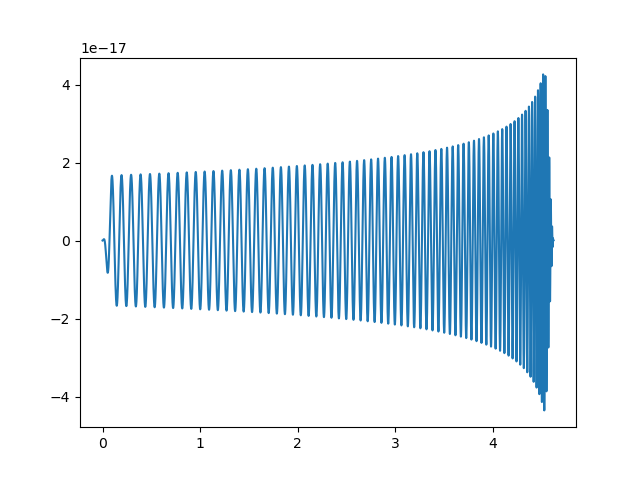

In [16]:
h = GW.generation(35.,35.,10000.,scan_rate_hz)
template_time = np.arange(len(h)) * dt
plt.figure()
plt.plot(template_time, h)

### Choose your injection : 

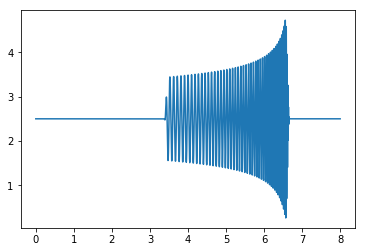

In [6]:
read_injection = pd.read_csv('template.txt',delimiter = ' ',header = None,names  = ['idx','data'], dtype  = {'idx': np.float,'data':np.float})
#read_injection = pd.read_csv('/home/etudiant/LAPP_TP_Michelson/Unknown1.txt',delimiter = ' ',header = None,names  = ['idx','data'], dtype  = {'idx': np.float,'data':np.float})

# GW Injection : Placing the signal at a random location into the noise
injection_GW = 40.e15*read_injection['idx'].astype(float)
signal_size = len(h)
data_size = 16000
data_time = np.arange(data_size) * dt
secret_signal_location = np.random.randint(0, data_size - signal_size)
injection_signal = np.zeros(data_size,dtype = "float")+2.5
injection_signal[secret_signal_location:secret_signal_location + signal_size] += injection_GW

plt.figure()
plt.plot(data_time, injection_signal)
plt.show()




### Generate noise and add signal

To be done

### Plotting

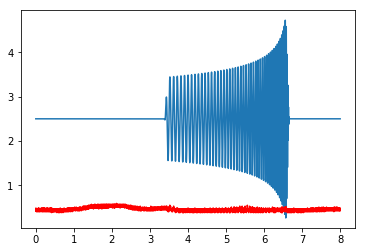

In [8]:
plt.figure()
plt.plot(data_time,injection_signal)
plt.plot(data_time,detection_signal, color='red')
plt.show()

### Writing output

In [9]:
output = pd.DataFrame(detection_signal)
output.to_csv("Data6_off.txt", sep = ' ',index = False, header = None)
output2 = pd.DataFrame(injection_signal)
output2.to_csv("Inj6_off.txt", sep = ' ',index = False, header = None)